## Problem Statement

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 18.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer
from sklearn import tree
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loan = pd.read_csv('/content/drive/MyDrive/PGP-AIML Program/Projects/Project 2 - Personal Loan Campaign/Loan_Modelling.csv')

In [ ]:
data = loan.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
data.head() #shows first five rows

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail() #shows last five rows

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.shape

(5000, 14)

- 5,000 rows
- 14 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- There is 1 float data type
- There is 13 int data type

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- The average age of the customers is around 45 years old.
- The average income is around 74 thousand dollars.
- The maximum income of the customers is 224.00 thousand dollars.
- The average mortgage of houses is around 57 thousand dollars.
- The maximum mortgage of houses is 635.0 thousand dollars.
- The maximum family size of the customers is 4.
- For the experience, why is there a negative for the min (-3.0)?

In [ ]:
data.duplicated().sum()

0

- There are no duplicates in the data.

In [ ]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


- There are no missing/null values in the data.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?



**1.   What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**



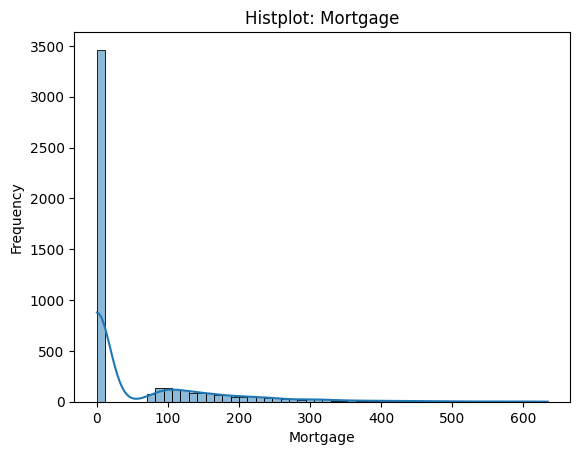

In [ ]:
plt.title('Histplot: Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
sns.histplot(data=data, x='Mortgage', kde=True);

- Many customer (almost 3000+) don't have mortgages or they didn't mention.
- The data is skewed to the right.
- The majority of the data lies in the 0 to 100 range.

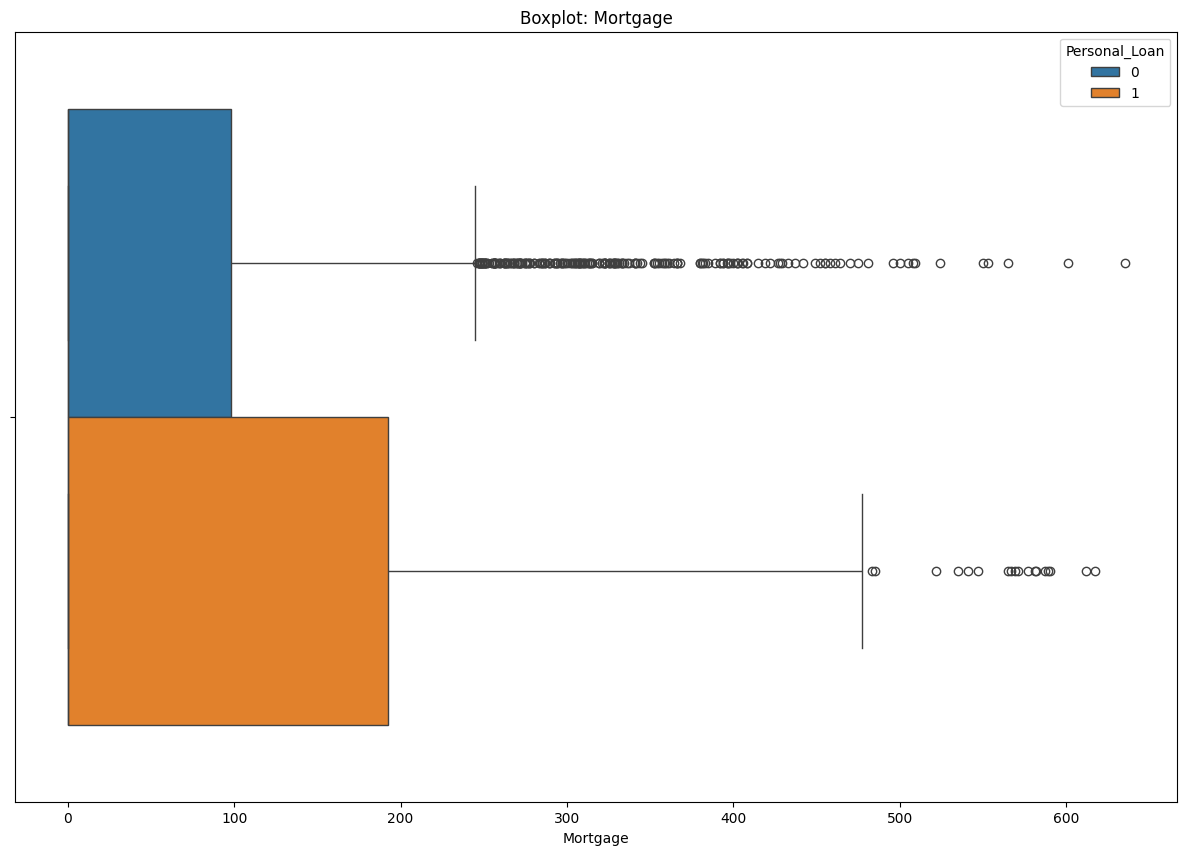

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Boxplot: Mortgage')
plt.xlabel('Mortgage')
sns.boxplot(data=data, x='Mortgage', hue='Personal_Loan');

- The majority of the data is resided in the 0 - 100 range.
- The data is skewed to the right.
- There are several outliers but I think we should keep the outliers because they might give some some insights.
- When the mortgage is high the customer took out a loan.

**2.   How many customers have credit cards?**


,0
CreditCard,
0,3530
1,1470


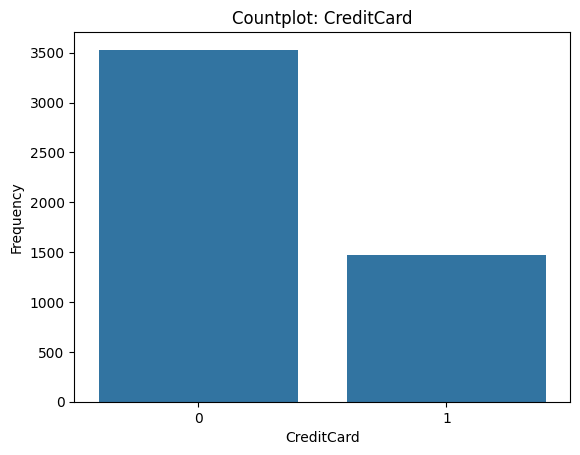

In [ ]:
plt.title('Countplot: CreditCard')
plt.xlabel('CreditCard')
plt.ylabel('Frequency')
sns.countplot(data=data, x='CreditCard');
data.groupby('CreditCard').size()

- There are 1470 customers that use credit cards that were issued by other banks.

**3.   What are the attributes that have a strong correlation with the target attribute (personal loan)?**



In [ ]:
numerical_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'CD_Account', 'ID', 'Education', 'Securities_Account']
target_column = 'Personal_Loan'

correlations = data[numerical_columns + [target_column]].corr()

# Extract the correlation of each numerical feature with the target
correlation_with_target = correlations[target_column].sort_values(ascending=False)

# Print the results
print(correlation_with_target)

Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


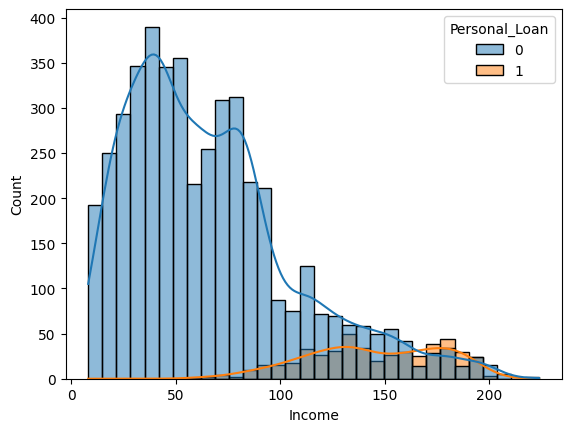

In [ ]:
sns.histplot(data=data, x='Income', kde=True, hue='Personal_Loan');

- Based on the graph, higher income customers are likely to take a loan.
- Majority of the customers who didn't take a loan are those that have lower income.

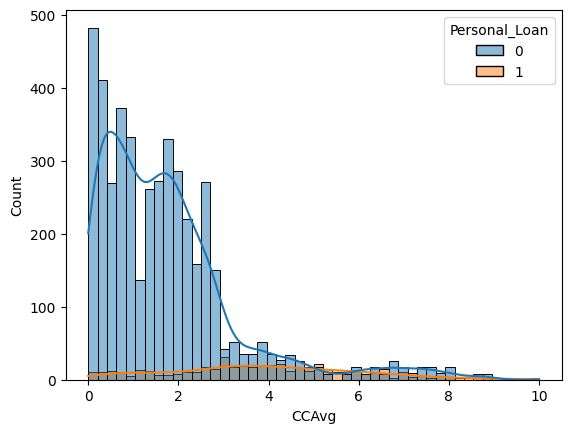

In [ ]:
sns.histplot(data=data, x='CCAvg', kde=True, hue='Personal_Loan');

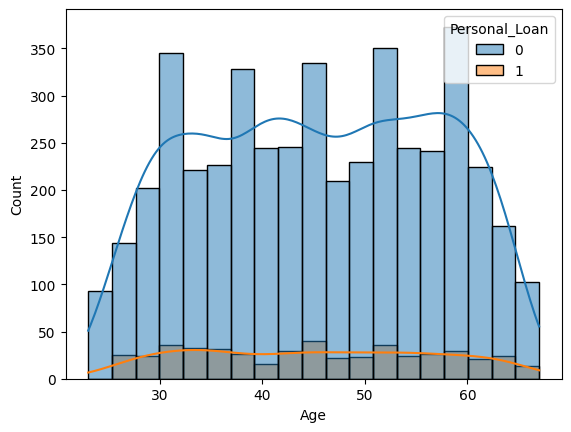

In [ ]:
sns.histplot(data=data, x='Age', kde=True, hue='Personal_Loan');

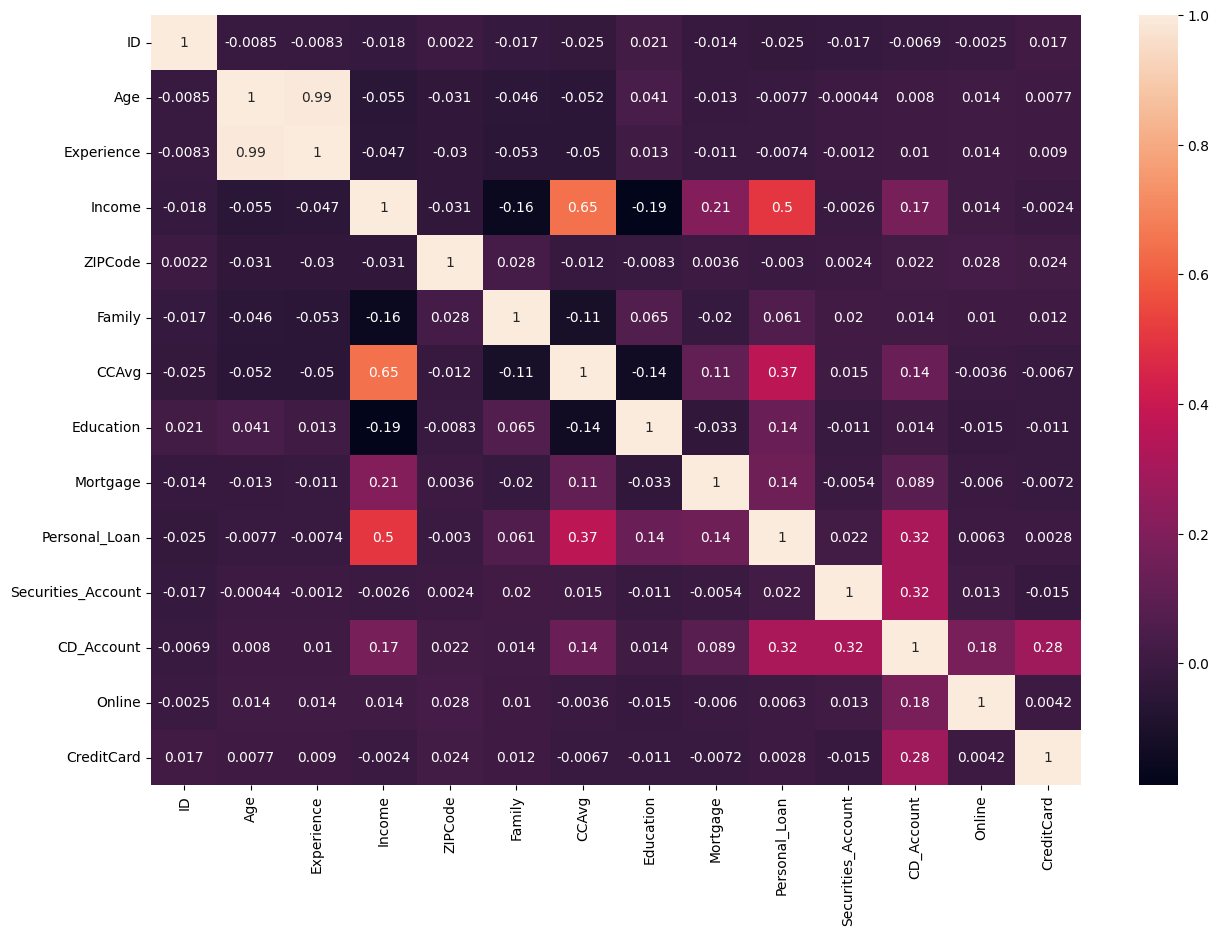

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True);

- Income has an okay correlation (0.502462) to the target attribute.
- CCAvg has an okay correlation (0.366889) to the target attribute.
- CD_Account has an okay correlation (0.316355) to the target attribute.
- Age and Experience have a strong correlation because as age increased their experience also increase, so it makes sense that they are strongly correlated.

**4.   How does a customer's interest in purchasing a loan vary with their age?**



In [ ]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Create a new column in your dataframe
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

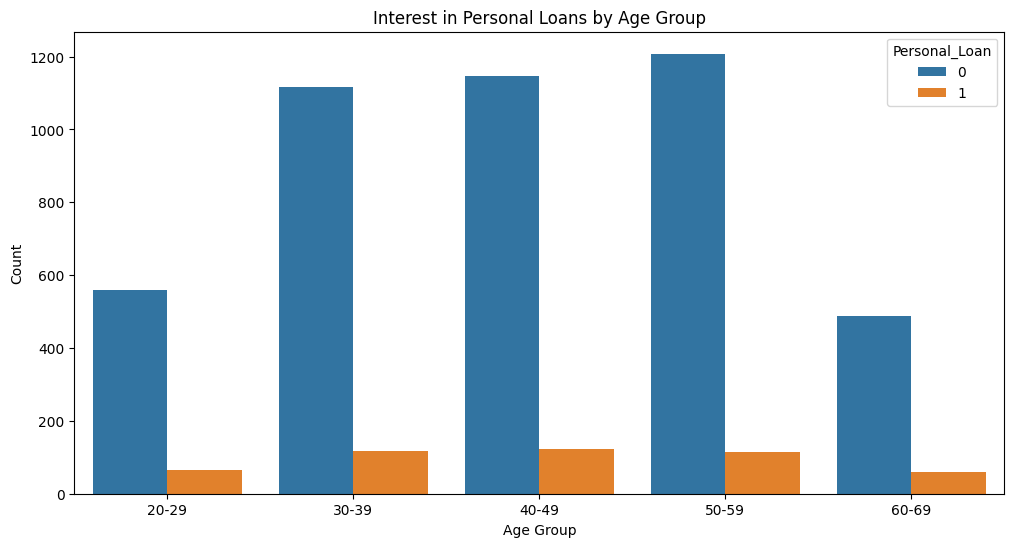

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Interest in Personal Loans by Age Group')
sns.countplot(data=data, x='Age_Group', hue='Personal_Loan')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

- In the last campaign, many of the customers did not accept the personal loans.
- The age group that rejected the the loan was 50-59 year olds.
- All of the age groups rejected the loan in the last campaign.

**5.   How does a customer's interest in purchasing a loan vary with their education?**



In [ ]:
data.groupby('Education').size()

,0
Education,
1,2096
2,1403
3,1501


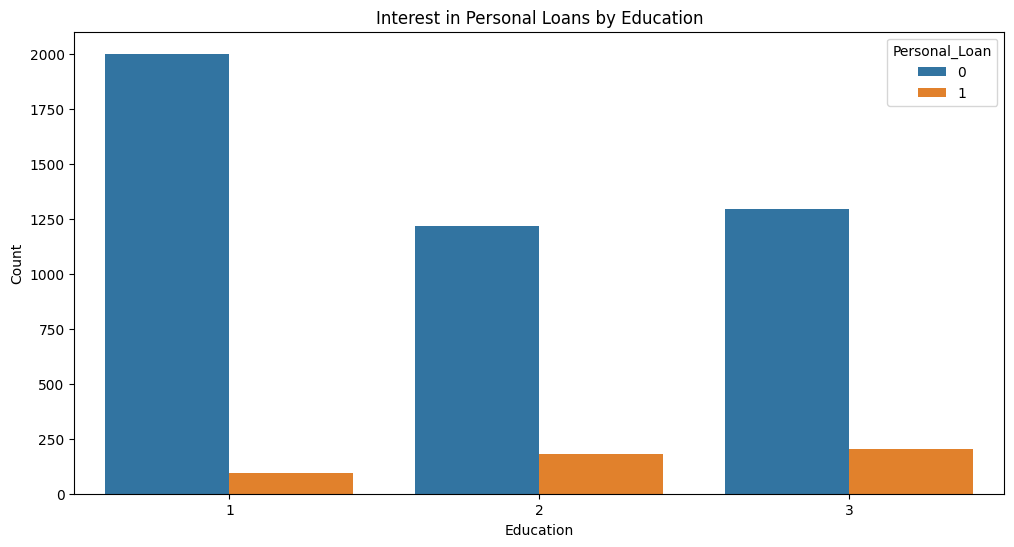

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Interest in Personal Loans by Education')
sns.countplot(data=data, x='Education', hue='Personal_Loan')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

- Undergraduates had the highest count who did not take the loan in the last campaign.
- The highest group that took the loan were the professionals.
- As education increases the customers age increases and they have a need to take out a personal loan for something (house, etc.)
- Undergraduates don't usually take out a loan because they are still young and don't have huge responsibilities.

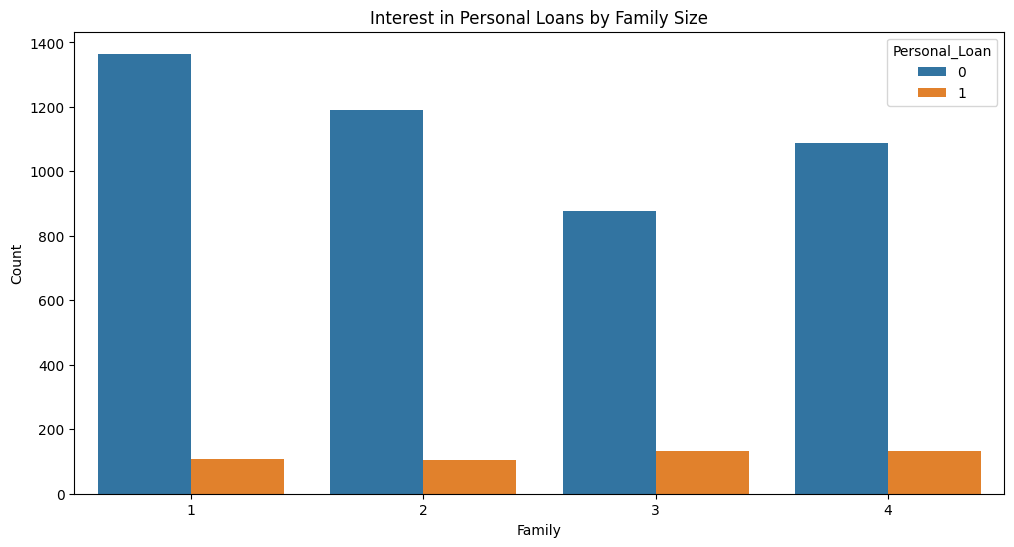

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Interest in Personal Loans by Family Size')
sns.countplot(data=data, x='Family', hue='Personal_Loan')
plt.xlabel('Family')
plt.ylabel('Count')
plt.show()

- When the family size is more there is a high chance that that customer will take a loan.
- This is because they have more responsibilities so they take out a loan.
- When there is one person they don't have too much responsibilities

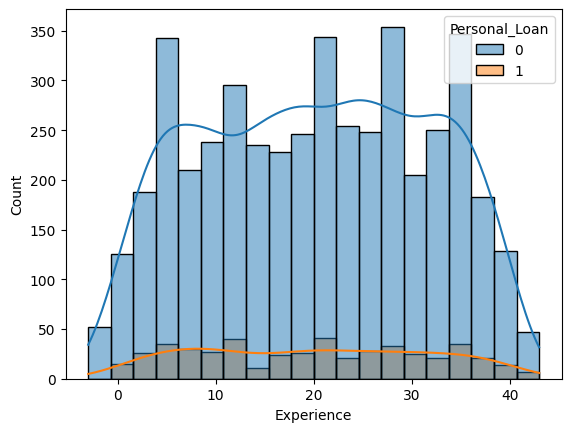

In [ ]:
sns.histplot(data=data, x='Experience', kde=True, hue='Personal_Loan');

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
data['Experience'].min()

-3

- Why is this negative? Is it a typo?

In [ ]:
data['Experience'] = data['Experience'].apply(lambda x: 0 if x < 0 else x)

- If the experience level is less than zero (negative), convert to zero.

In [ ]:
data['Experience'].min()

0

In [ ]:
data.isna().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


- There are no missing values, so don't have to treat them.

In [ ]:
data = pd.get_dummies(data, columns=['Education', 'Family'], drop_first=True)
data.head()

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_Group,Education_2,Education_3,Family_2,Family_3,Family_4
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,20-29,False,False,False,False,True
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,40-49,False,False,False,True,False
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,30-39,False,False,False,False,False
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,30-39,True,False,False,False,False
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,30-39,True,False,False,False,True


In [ ]:
data.drop(['Age_Group'], axis=1, inplace=True)
data.drop(['Experience'], axis=1, inplace=True)
data.drop(['ID'], axis=1, inplace=True)
data.drop(['ZIPCode'], axis=1, inplace=True)

In [ ]:
data.head()

,Age,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,49,1.6,0,0,1,0,0,0,False,False,False,False,True
1,45,34,1.5,0,0,1,0,0,0,False,False,False,True,False
2,39,11,1.0,0,0,0,0,0,0,False,False,False,False,False
3,35,100,2.7,0,0,0,0,0,0,True,False,False,False,False
4,35,45,1.0,0,0,0,0,0,1,True,False,False,False,True


In [ ]:
X = data.drop(['Personal_Loan'], axis=1)
y = data['Personal_Loan']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((4000, 13), (1000, 13))

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions:**

1. Predicting a customer will not take the loan but in reality the customer would be willing to take the loan.

2. Predicting a customer will take the loan but in reality the customer would not take the loan.

**Which is important?**

* If we predict a customer will not take the loan but in reality they will take the loan, the bank would lose an opportunity of providing loan to a potential customer.

**Reduce False Negative**
* A higher 'recall' will minimize the false negatives.

### Model Building

####**Decision Tree - Default**

In [ ]:
model1 = DecisionTreeClassifier(random_state=42)

model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Decision Tree - Default - Training Set**

In [ ]:
model1_train_pred = model1.predict(X_train)

In [ ]:
model1_train_acc = accuracy_score(y_train, model1_train_pred)
model1_train_recall = recall_score(y_train, model1_train_pred)
model1_train_precision = precision_score(y_train, model1_train_pred)
model1_train_f1 = f1_score(y_train, model1_train_pred)

In [ ]:
df_model1_train = pd.DataFrame(
        {"Accuracy": model1_train_acc, "Recall": model1_train_recall, "Precision": model1_train_precision, "F1": model1_train_f1,},
        index=[0],
    )
df_model1_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Text(0.5, 14.722222222222216, 'Predicted label')

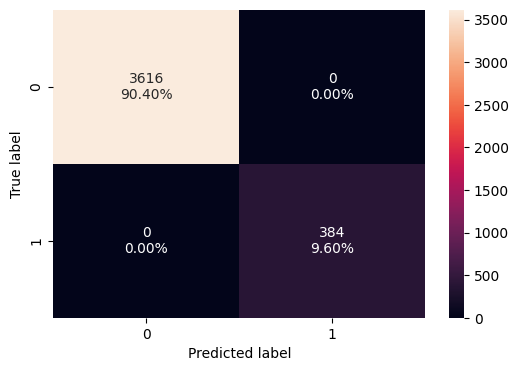

In [ ]:
model1_train_cm = confusion_matrix(y_train, model1_train_pred)

labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / model1_train_cm.flatten().sum())]
            for item in model1_train_cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))

sns.heatmap(model1_train_cm, annot=labels, fmt="")

plt.ylabel("True label")

plt.xlabel("Predicted label")

**Decision Tree - Default - Testing Set**







In [ ]:
model1_test_pred = model1.predict(X_test)

In [ ]:
model1_test_acc = accuracy_score(y_test, model1_test_pred)
model1_test_recall = recall_score(y_test, model1_test_pred)
model1_test_precision = precision_score(y_test, model1_test_pred)
model1_test_f1 = f1_score(y_test, model1_test_pred)

In [ ]:
df_model1_test = pd.DataFrame(
        {"Accuracy": model1_test_acc, "Recall": model1_test_recall, "Precision": model1_test_precision, "F1": model1_test_f1,},
        index=[0],
    )
df_model1_test

,Accuracy,Recall,Precision,F1
0,0.984,0.90625,0.925532,0.915789


Text(0.5, 14.722222222222216, 'Predicted label')

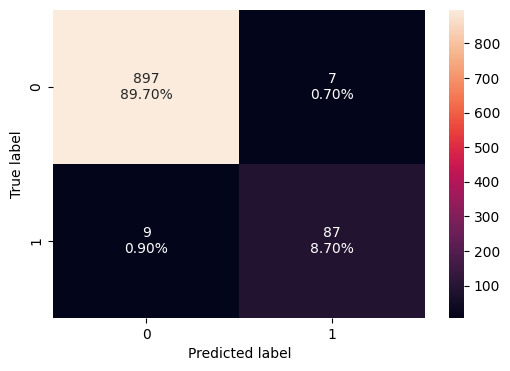

In [ ]:
model1_test_cm = confusion_matrix(y_test, model1_test_pred)

labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / model1_test_cm.flatten().sum())]
            for item in model1_test_cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))

sns.heatmap(model1_test_cm, annot=labels, fmt="")

plt.ylabel("True label")

plt.xlabel("Predicted label")

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3', 'Family_2', 'Family_3', 'Family_4']


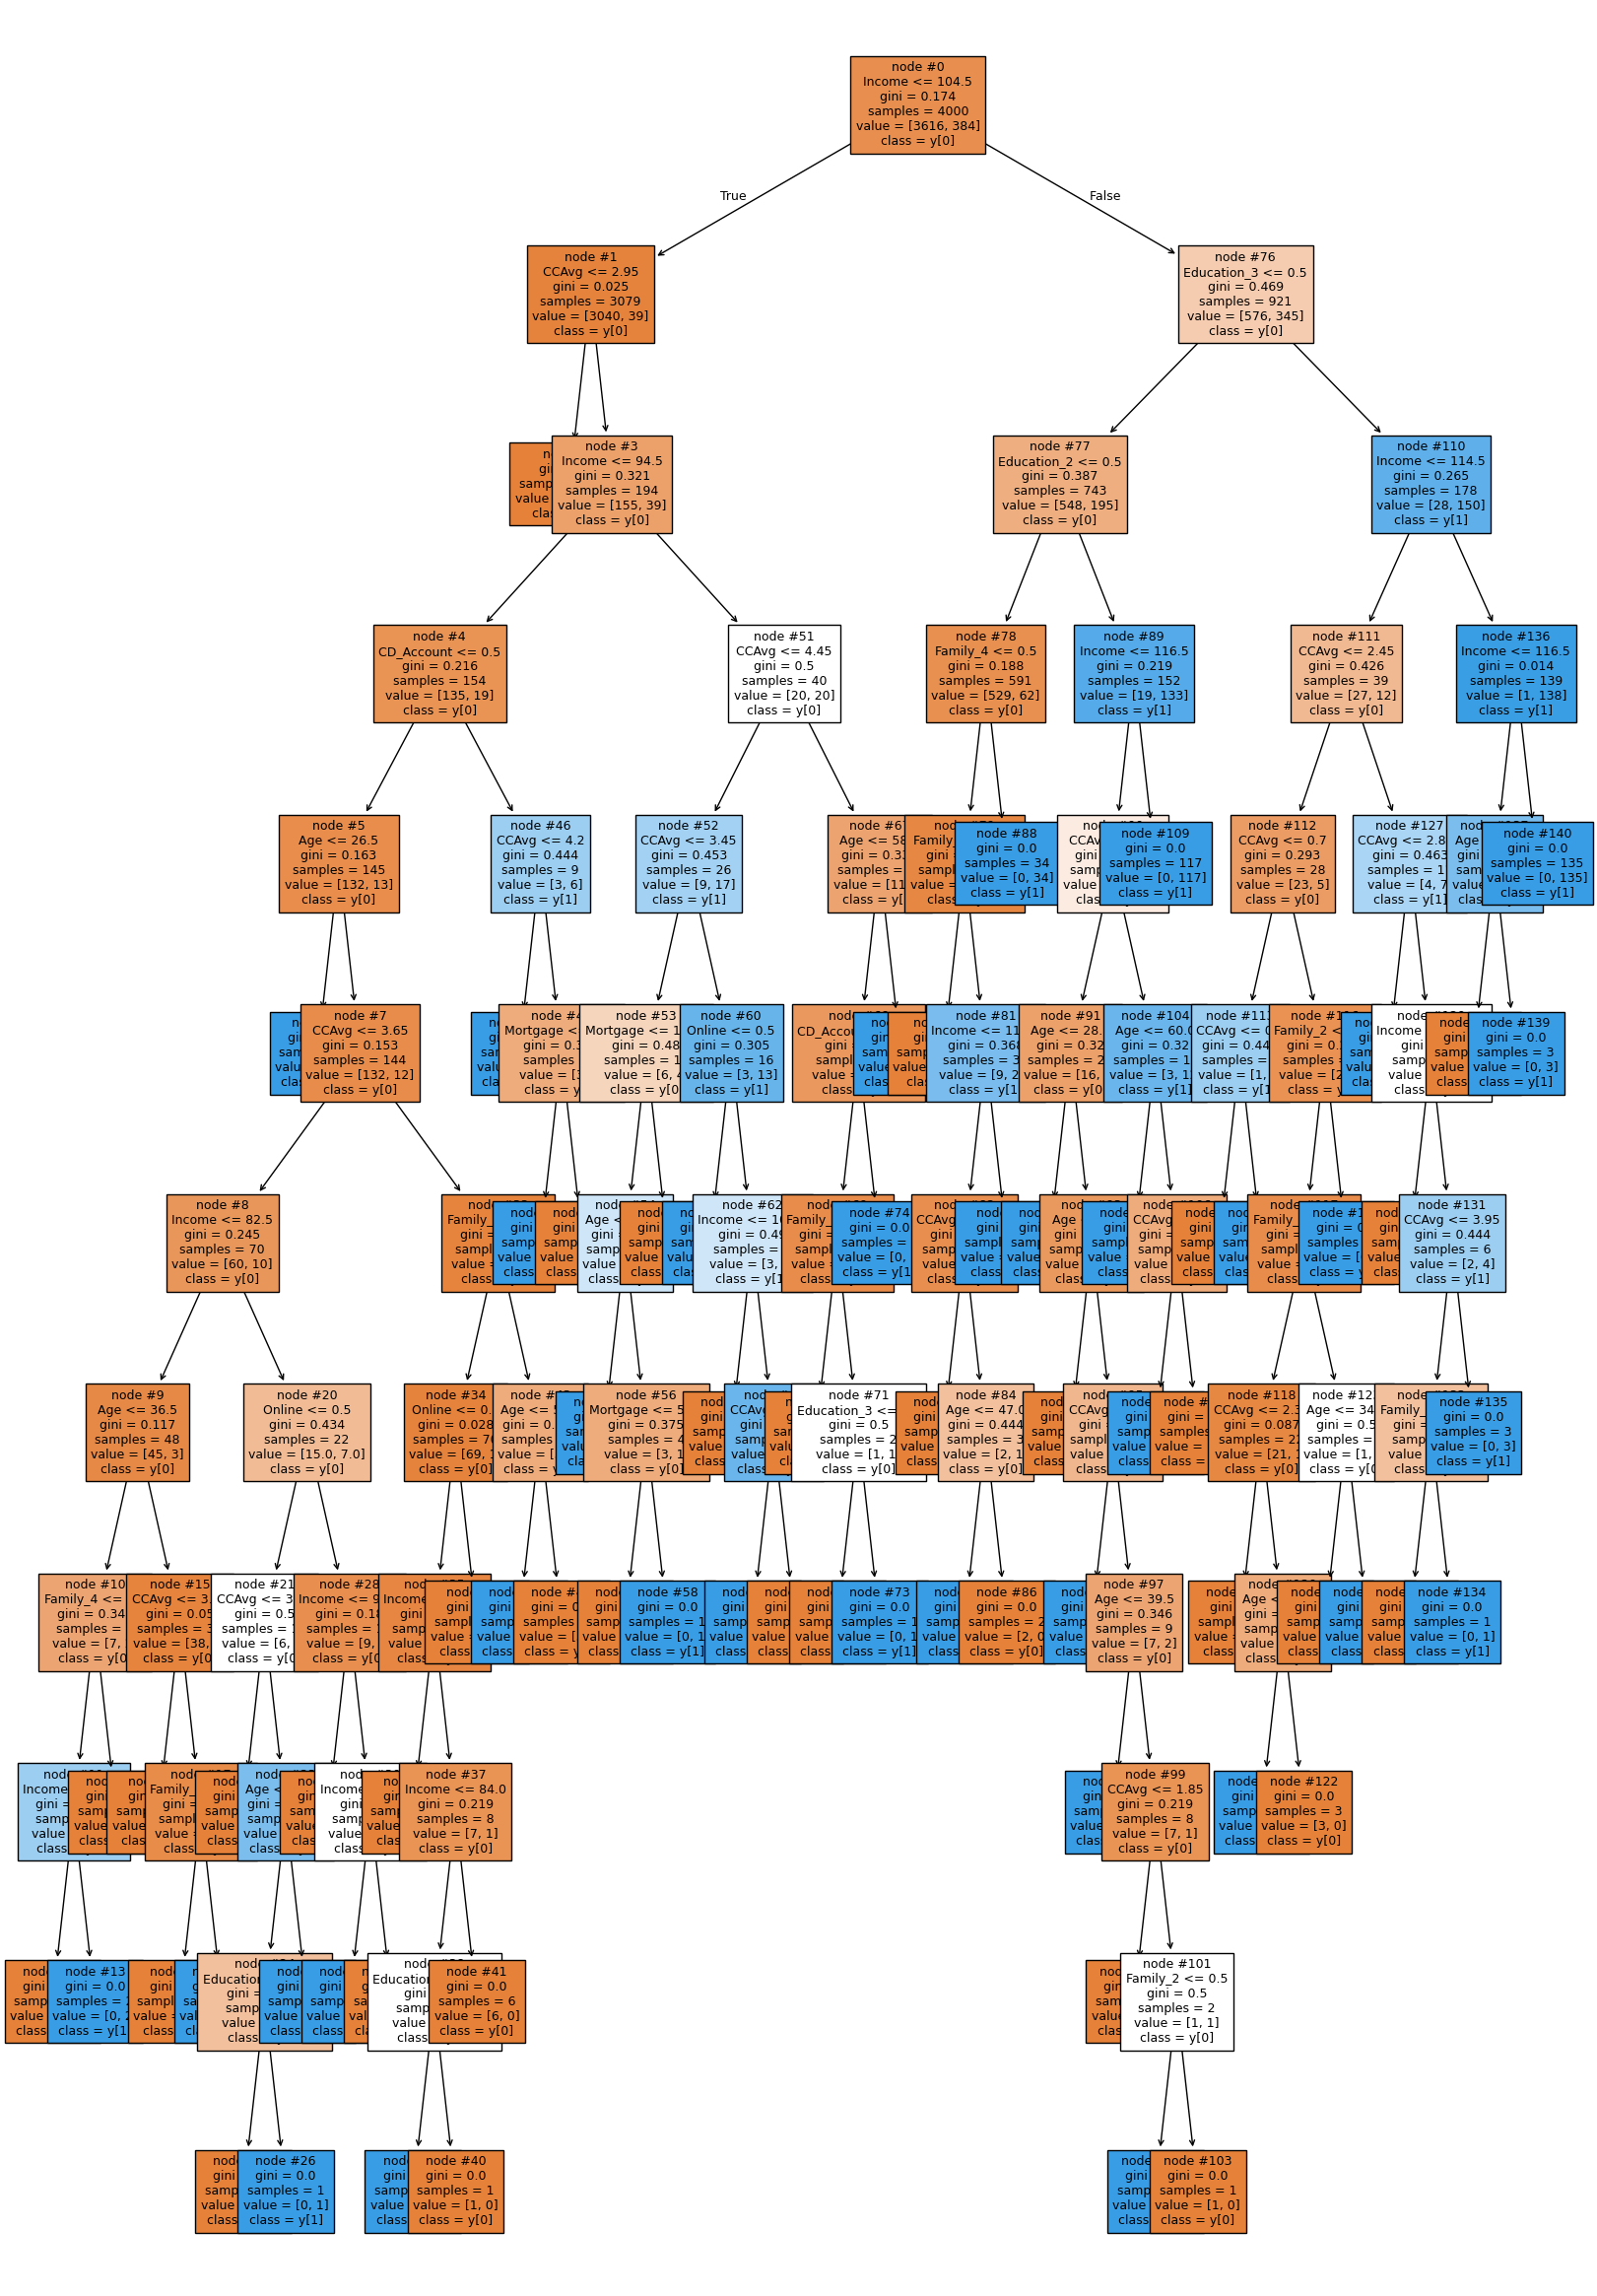

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2885.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 94.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 63.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Income >  63.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.45
|   |   |   |   |   |  

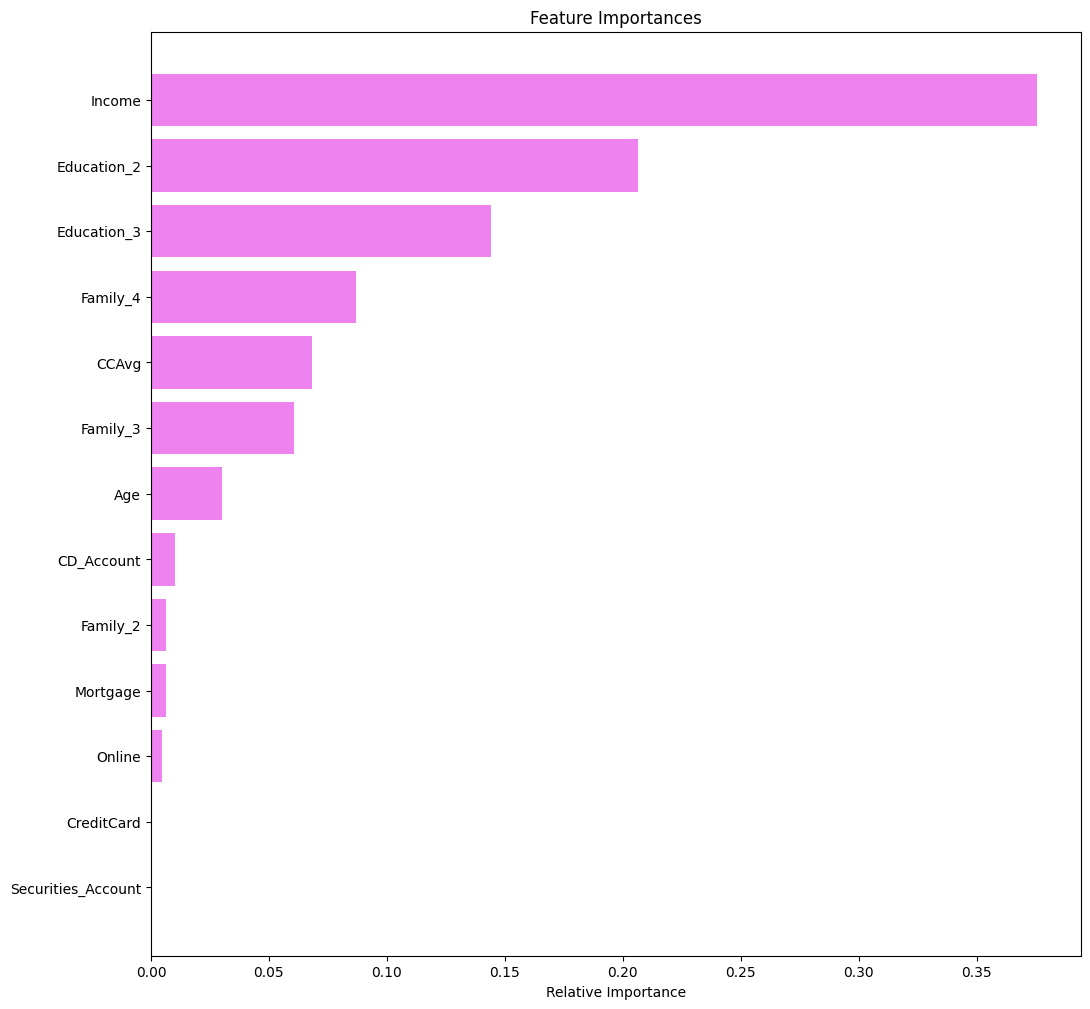

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The model1 is overfitting to the training dataset.
- On the training dataset the metrics were all 1 and on the testing dataset the metrics were reduced which means the model just remembered the training dataset and did not generalize well to the testing dataset.

####**Decision Tree - Pre-Pruning**

In [ ]:
#parameters of the tree
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = [10, 20, 30, 50]

# 3*4*4 = 48 different models trained

#storing best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            estimator = DecisionTreeClassifier(
                max_depth = max_depth,
                max_leaf_nodes = max_leaf_nodes,
                min_samples_split = min_samples_split,
                #class_weight = 'balanced',
                random_state = 42
            )

            estimator.fit(X_train, y_train)

            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            score_diff = abs(train_recall_score - test_recall_score)

            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

model2 = best_estimator

print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 20
Min samples split: 50
Best test recall score: 0.8541666666666666


In [ ]:
'''estimator = DecisionTreeClassifier(random_state=1)

parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

acc_scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best Hyperparameters:", grid_obj.best_params_)
print("Best Recall (CV):", grid_obj.best_score_)

model2 = grid_obj.best_estimator_
model2.fit(X_train, y_train)'''

'estimator = DecisionTreeClassifier(random_state=1)\n\nparameters = {\n    "max_depth": np.arange(6, 15),\n    "min_samples_leaf": [1, 2, 5, 7, 10],\n    "max_leaf_nodes": [2, 3, 5, 10],\n}\n\nacc_scorer = make_scorer(recall_score)\n\ngrid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)\ngrid_obj = grid_obj.fit(X_train, y_train)\n\nprint("Best Hyperparameters:", grid_obj.best_params_)\nprint("Best Recall (CV):", grid_obj.best_score_)\n\nmodel2 = grid_obj.best_estimator_\nmodel2.fit(X_train, y_train)'

**Decision Tree - Pre-Pruning - Training Set**

In [ ]:
model2.fit(X_train, y_train)
model2_train_pred = model2.predict(X_train)

In [ ]:
model2_train_acc = accuracy_score(y_train, model2_train_pred)
model2_train_recall = recall_score(y_train, model2_train_pred)
model2_train_precision = precision_score(y_train, model2_train_pred)
model2_train_f1 = f1_score(y_train, model2_train_pred)

In [ ]:
df_model2_train = pd.DataFrame(
        {"Accuracy": model2_train_acc, "Recall": model2_train_recall, "Precision": model2_train_precision, "F1": model2_train_f1,},
        index=[0],
    )
df_model2_train

,Accuracy,Recall,Precision,F1
0,0.98175,0.84375,0.961424,0.898752


Text(0.5, 14.722222222222216, 'Predicted label')

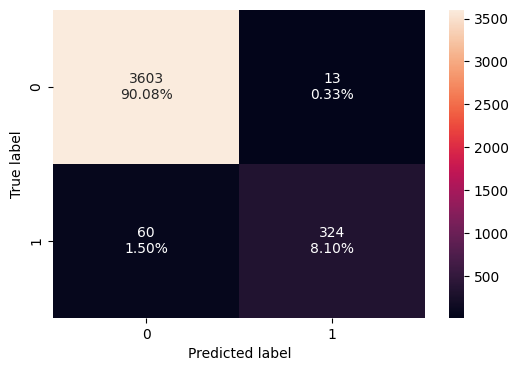

In [ ]:
model2_train_cm = confusion_matrix(y_train, model2_train_pred)

labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / model2_train_cm.flatten().sum())]
            for item in model2_train_cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))

sns.heatmap(model2_train_cm, annot=labels, fmt="")

plt.ylabel("True label")

plt.xlabel("Predicted label")

**Decision Tree - Pre-Pruning - Testing Set**


In [ ]:
model2_test_pred = model2.predict(X_test)

In [ ]:
model2_test_acc = accuracy_score(y_test, model2_test_pred)
model2_test_recall = recall_score(y_test, model2_test_pred)
model2_test_precision = precision_score(y_test, model2_test_pred)
model2_test_f1 = f1_score(y_test, model2_test_pred)

In [ ]:
df_model2_test = pd.DataFrame(
        {"Accuracy": model2_test_acc, "Recall": model2_test_recall, "Precision": model2_test_precision, "F1": model2_test_f1,},
        index=[0],
    )
df_model2_test

,Accuracy,Recall,Precision,F1
0,0.983,0.854167,0.964706,0.906077


Text(0.5, 14.722222222222216, 'Predicted label')

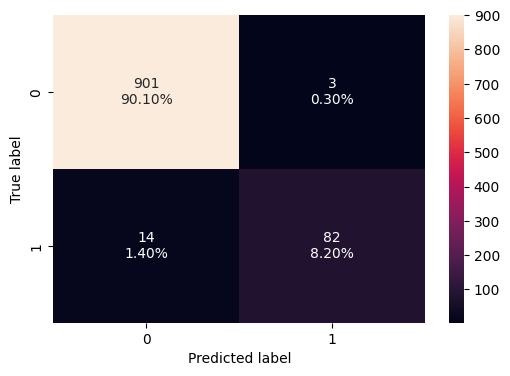

In [ ]:
model2_test_cm = confusion_matrix(y_test, model2_test_pred)

labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / model2_test_cm.flatten().sum())]
            for item in model2_test_cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))

sns.heatmap(model2_test_cm, annot=labels, fmt="")

plt.ylabel("True label")

plt.xlabel("Predicted label")

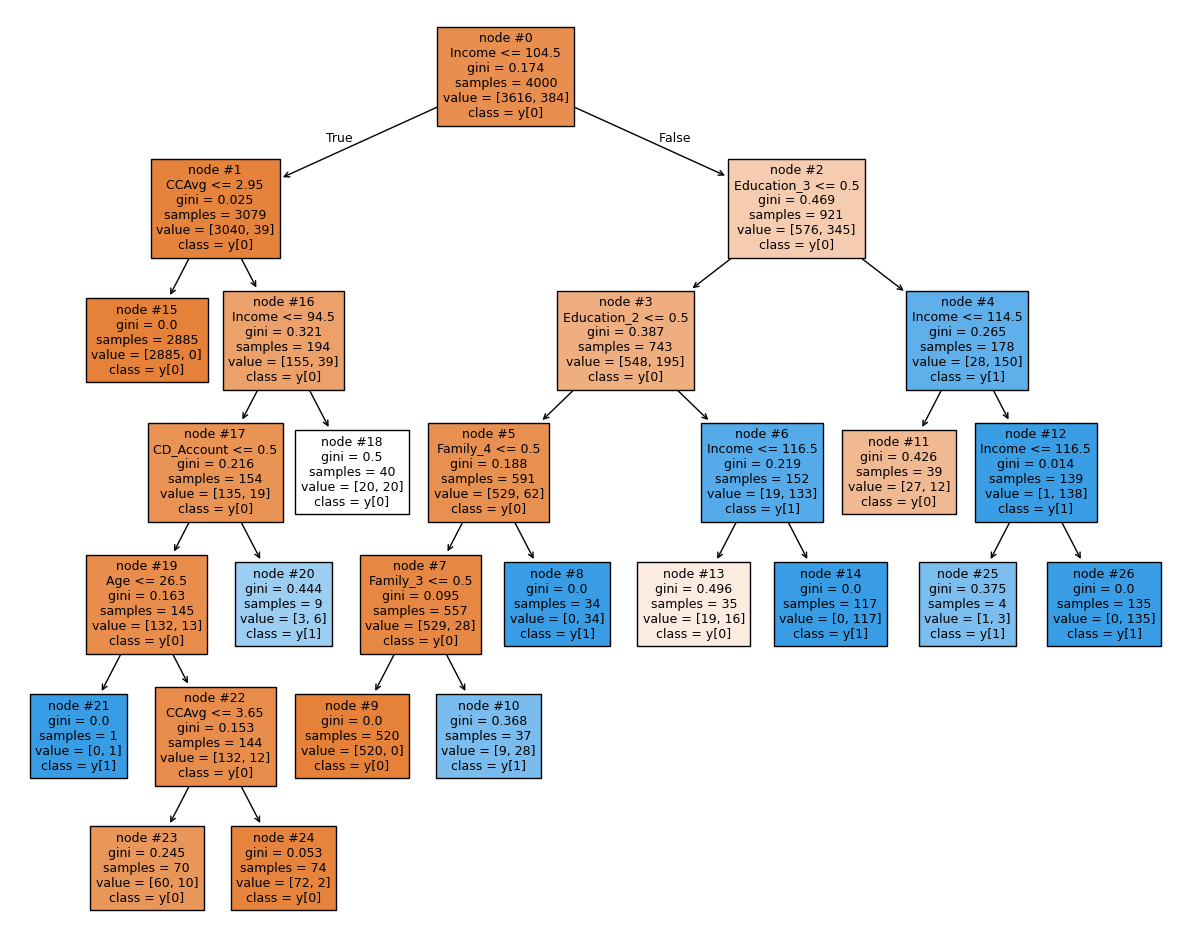

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2885.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 94.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- weights: [60.00, 10.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.65
|   |   |   |   |   |   |--- weights: [72.00, 2.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [3.00, 6.00] class: 1
|   |   |--- Income >  94.50
|   |   |   |--- weights: [20.00, 20.00] class: 0
|--- Income >  104.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- weights: [520.00, 0.00] class: 0
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |--- Fa

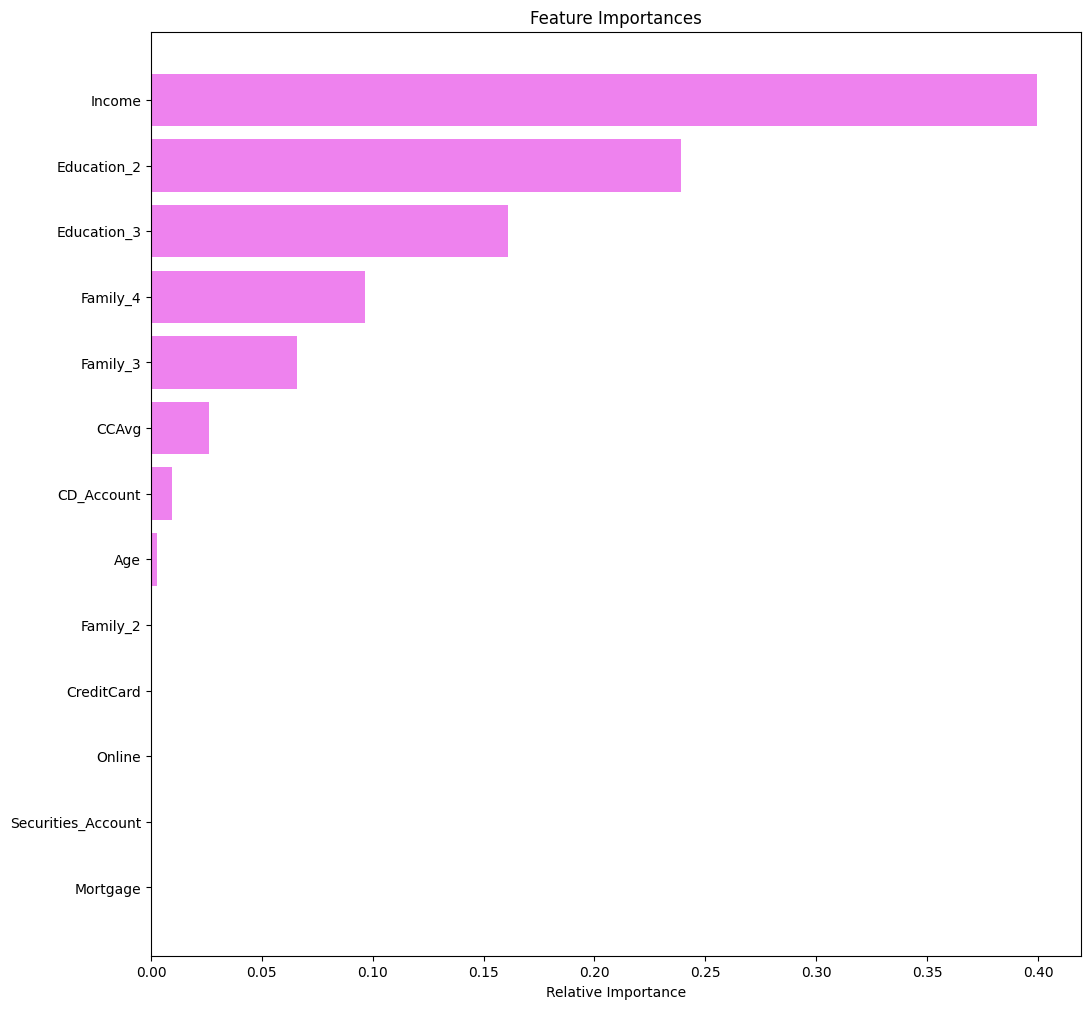

In [ ]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####**Decision Tree - Post-Pruning**

**Decision Tree - Post-Pruning - Training Set**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000123,0.000493
2,0.000219,0.000930
3,0.000225,0.001380
4,0.000225,0.001830
5,0.000229,0.002289
6,0.000229,0.003205
7,0.000240,0.003685
8,0.000244,0.004173
9,0.000248,0.004669


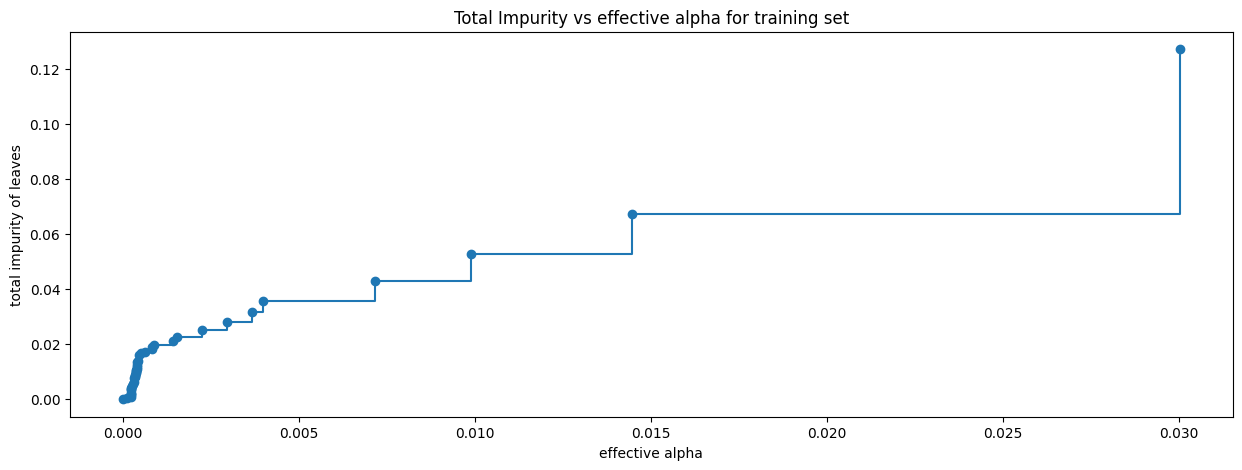

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.046432259621498106


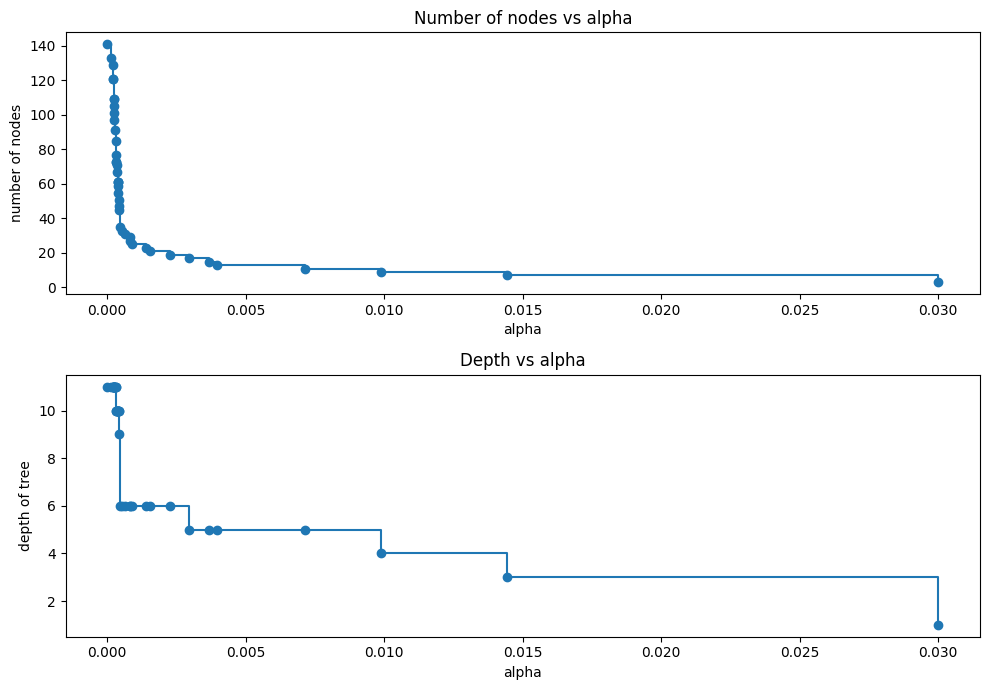

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

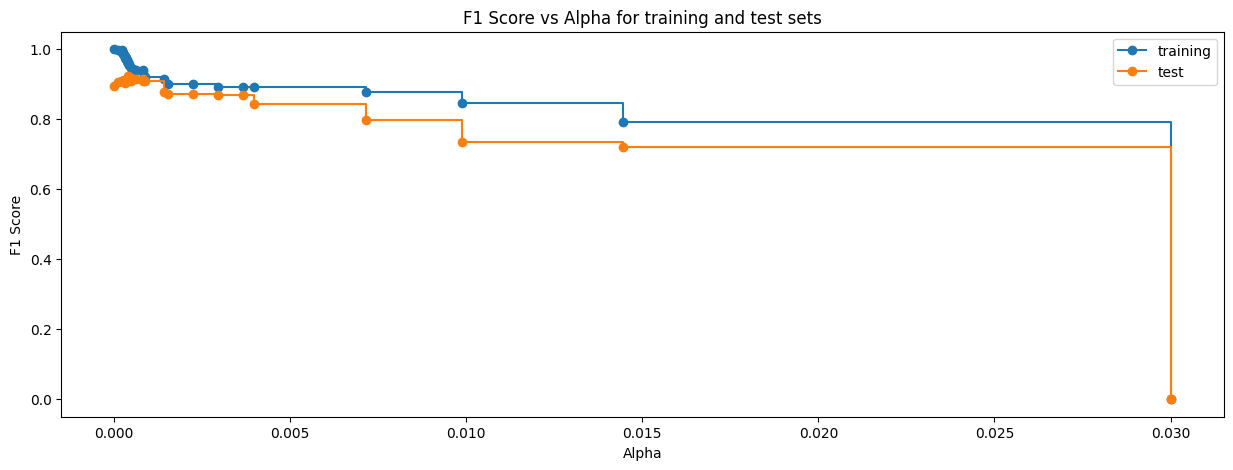

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
model3 = clfs[index_best_model]
print(model3)

DecisionTreeClassifier(ccp_alpha=0.00040178571428571444, random_state=1)


In [ ]:
model3.fit(X_train, y_train)
model3_train_pred = model3.predict(X_train)

In [ ]:
model3_train_acc = accuracy_score(y_train, model3_train_pred)
model3_train_recall = recall_score(y_train, model3_train_pred)
model3_train_precision = precision_score(y_train, model3_train_pred)
model3_train_f1 = f1_score(y_train, model3_train_pred)

In [ ]:
df_model3_train = pd.DataFrame(
        {"Accuracy": model3_train_acc, "Recall": model3_train_recall, "Precision": model3_train_precision, "F1": model3_train_f1,},
        index=[0],
    )
df_model3_train

,Accuracy,Recall,Precision,F1
0,0.99275,0.940104,0.983651,0.961385


Text(0.5, 14.722222222222216, 'Predicted label')

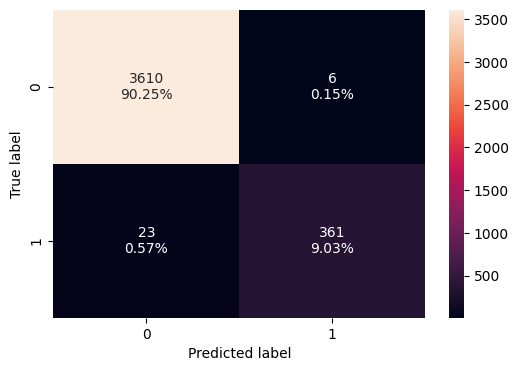

In [ ]:
model3_train_cm = confusion_matrix(y_train, model3_train_pred)

labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / model3_train_cm.flatten().sum())]
            for item in model3_train_cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))

sns.heatmap(model3_train_cm, annot=labels, fmt="")

plt.ylabel("True label")

plt.xlabel("Predicted label")

In [ ]:
model3_test_pred = model3.predict(X_test)

In [ ]:
model3_test_acc = accuracy_score(y_test, model3_test_pred)
model3_test_recall = recall_score(y_test, model3_test_pred)
model3_test_precision = precision_score(y_test, model3_test_pred)
model3_test_f1 = f1_score(y_test, model3_test_pred)

In [ ]:
df_model3_test = pd.DataFrame(
        {"Accuracy": model3_test_acc, "Recall": model3_test_recall, "Precision": model3_test_precision, "F1": model3_test_f1,},
        index=[0],
    )
df_model3_test

,Accuracy,Recall,Precision,F1
0,0.986,0.895833,0.955556,0.924731


Text(0.5, 14.722222222222216, 'Predicted label')

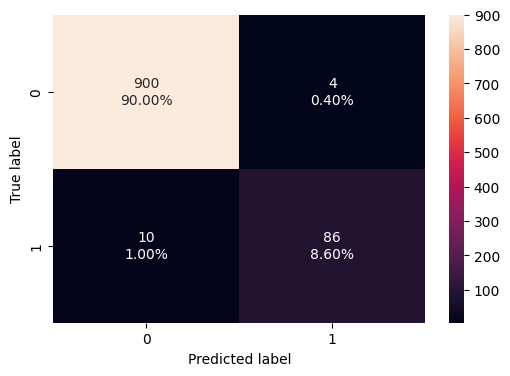

In [ ]:
model3_test_cm = confusion_matrix(y_test, model3_test_pred)

labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / model3_test_cm.flatten().sum())]
            for item in model3_test_cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))

sns.heatmap(model3_test_cm, annot=labels, fmt="")

plt.ylabel("True label")

plt.xlabel("Predicted label")

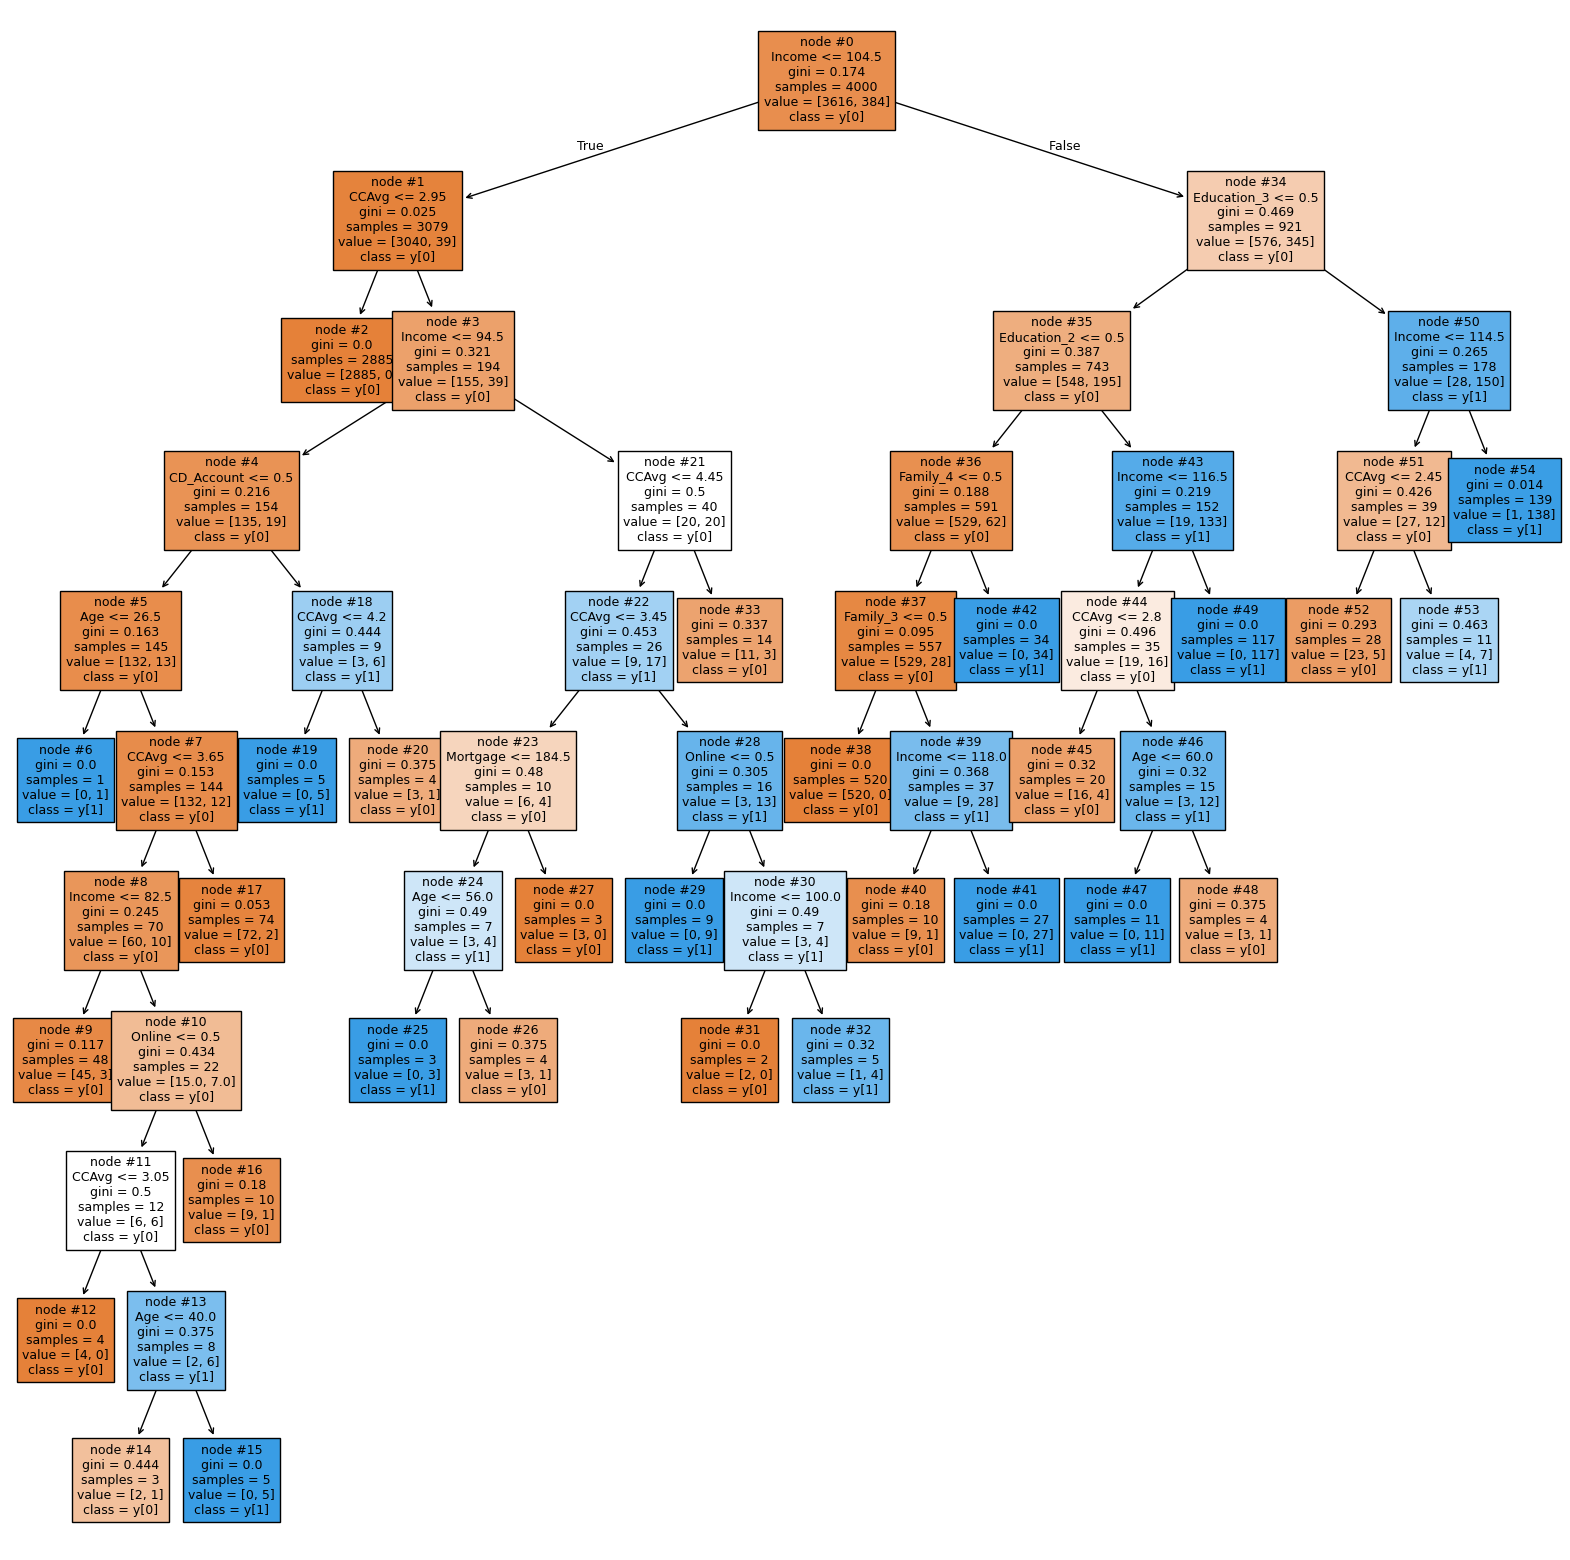

In [ ]:
plt.figure(figsize=(20, 20))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2885.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 94.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |--- weights: [45.00, 3.00] class: 0
|   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |   |--- Age <= 40.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 1.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  40.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   

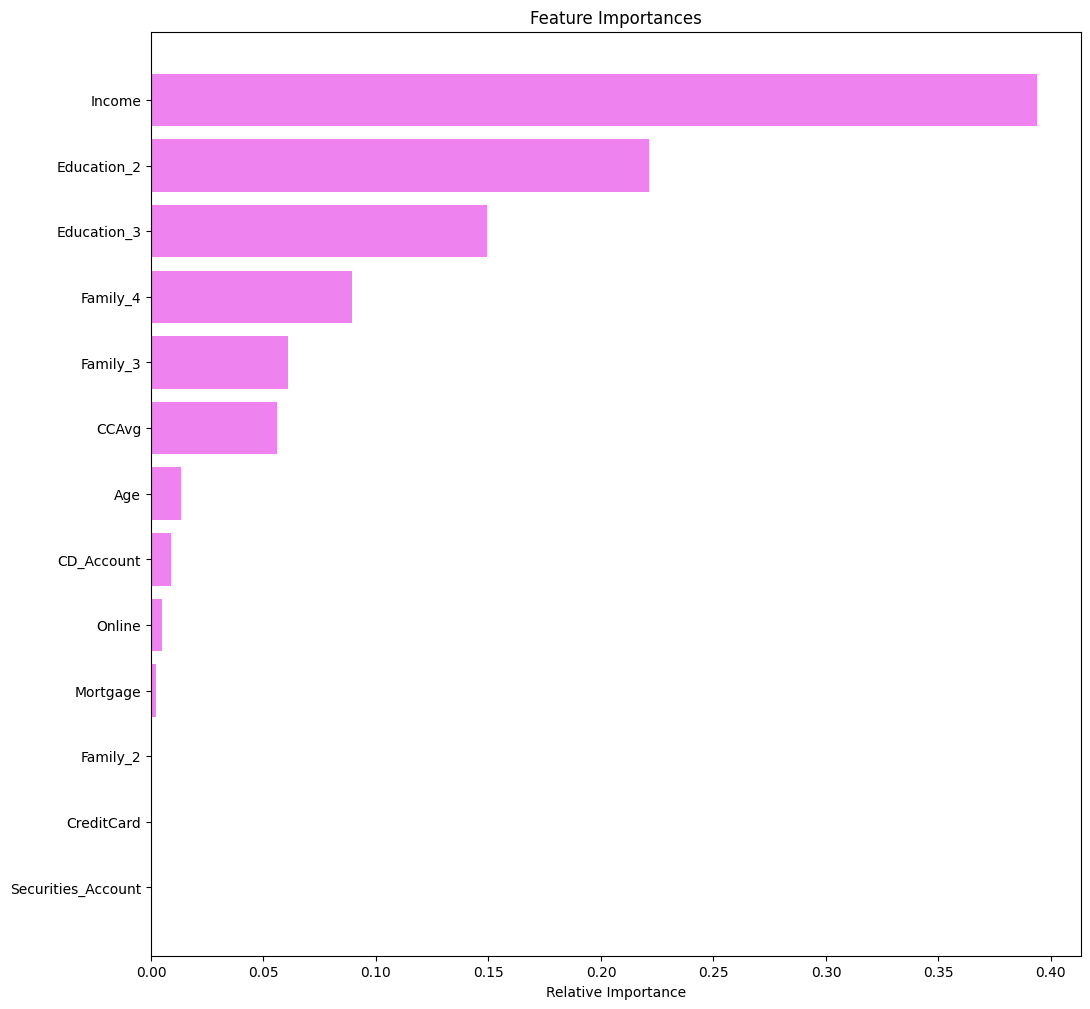

In [ ]:
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

In [ ]:
models_train_comp_df = pd.concat(
    [
        df_model1_train.T,
        df_model2_train.T,
        df_model3_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.981750,0.992750
Recall,1.0,0.843750,0.940104
Precision,1.0,0.961424,0.983651
F1,1.0,0.898752,0.961385


In [ ]:
models_test_comp_df = pd.concat(
    [
        df_model1_test.T,
        df_model2_test.T,
        df_model3_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.984000,0.983000,0.986000
Recall,0.906250,0.854167,0.895833
Precision,0.925532,0.964706,0.955556
F1,0.915789,0.906077,0.924731


- The best model would be model 2 (pre-pruned)
- Because on the training dataset the recall is 84.3% but on the testing dataset the recall is 85.4%
- We can see that model 2 does not overfit and generalizes well on unseen data
- The other two modelsare overfitting on the training dataset and performs poorly on testing dataset
- We can see that model 2 tree can be clearly visualised without being too complex
- The pre-pruned decision tree has almost 1.23% better performance on the test data than the train data.
  - This model uses a few more features for decision-making than the post-pruned decision tree.
  - This will result in a slightly longer prediction time but it is likely to yield better results on unseen data.

**Feature Importance**

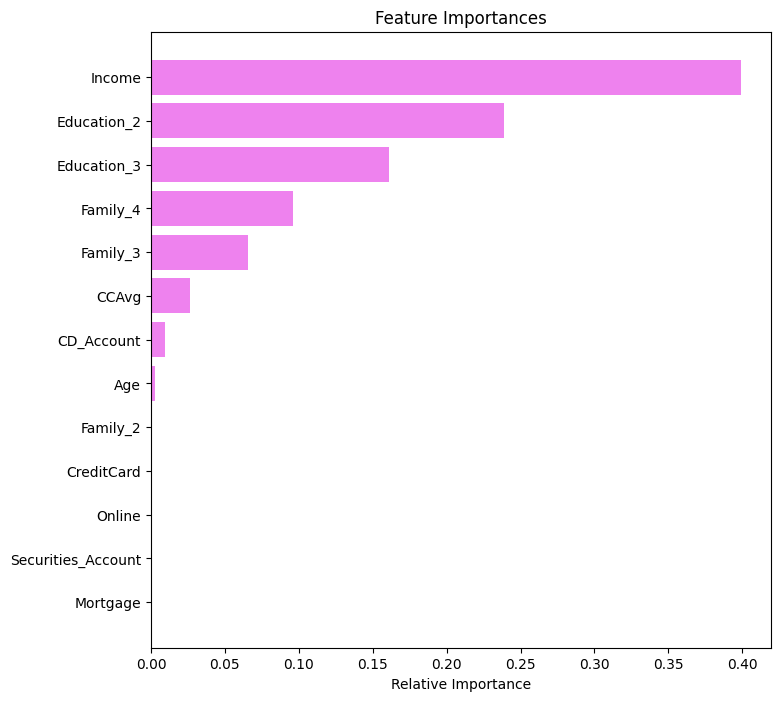

In [ ]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Income has the majority of the importance compared to other features
- Next Education and Family are next in line of importance.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

- In all three Decision Tree models Income is the most important feature that the model looks at.
- The decision tree model in the case study was employed to predict whether a liability customer of ALLLife Bank is likely to buy a personal loan.
- This gives 98.3% accuracy on predicting whether a liability customer of ALLLife Bank is likely to buy a personal loan for the pre-pruned model.
- Utilize customer segmentation techniques to identify distinct customer groups based on important features such as income level,education level, family size, credit card average. This will help in targeting specific customer segments with personalized marketing strategies.
- Tailor marketing messages, offers, and communication channels to each customer segment. Personalize the campaign by highlighting the benefits of personal loans that align with the unique needs and motivations of each segment. This will increase the relevance and effectiveness of the campaign.
- Develop informative materials such as blog posts, videos, or webinars that explain the benefits, eligibility criteria, and application process for personal loans. Address common questions and concerns to build trust and confidence among customers.

___